Author : Jayalakshmi K

# 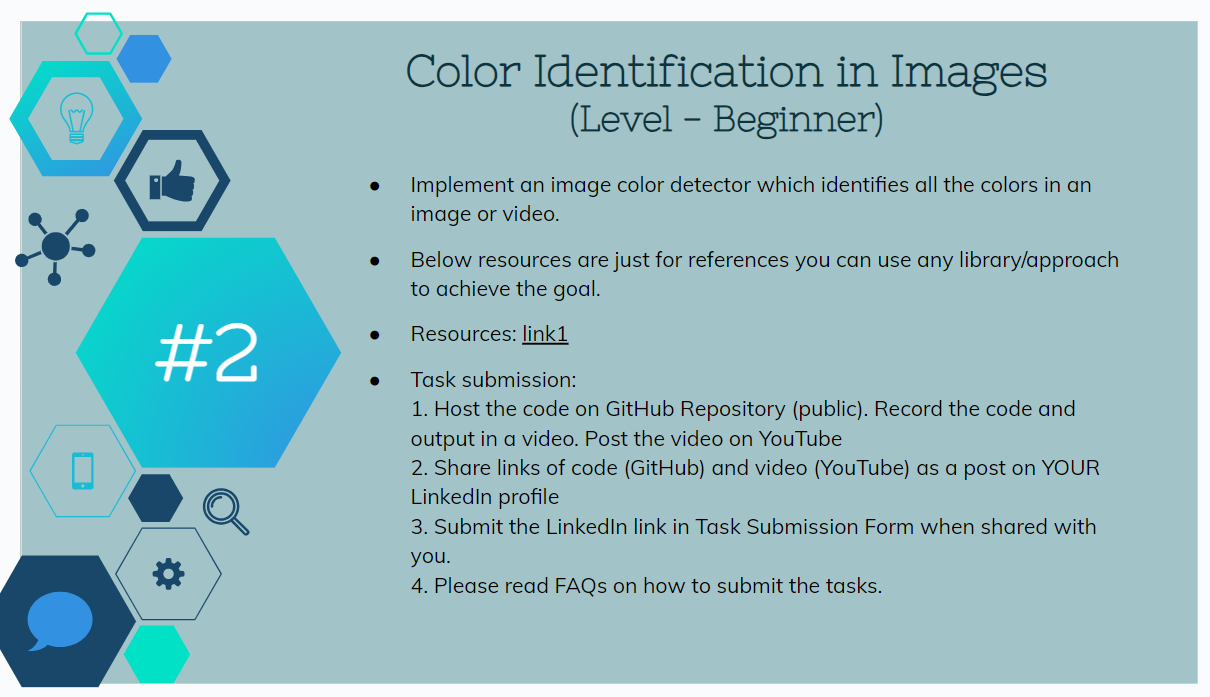

This notebook utilizes ML algorithm,K Means to extract colours from a given image and Image manipulation is performrd using OpenCV2.
The major colors are identified by applying KMeans and Matplotlib used for visualization.

### Improrting libraries

In [40]:
#importing libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from PIL import Image

import webcolors
%matplotlib inline

import warnings
# Suppress FutureWarning for KMeans
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)

### Loading image using OpenCV

In [41]:
# Load the image using OpenCV
image_opencv = cv2.imread('/content/sample_data/image.jpg')

# Print image type and shape
print(f"The type is: {type(image_opencv)}")
print(f"Shape: {image_opencv.shape}")

The type is: <class 'numpy.ndarray'>
Shape: (900, 685, 3)


### Checking demo Image

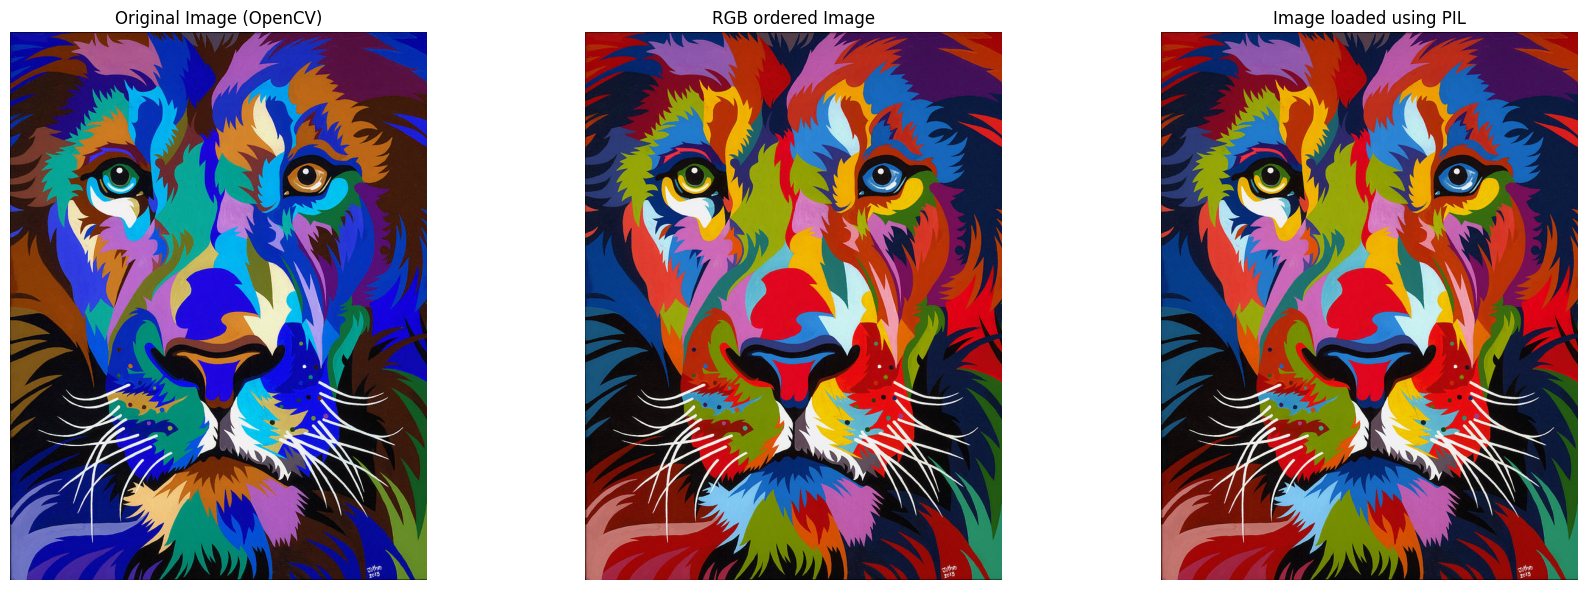

In [42]:
# Convert the image from BGR to RGB for display using OpenCV
image_rgb_opencv = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

# Load the same image using PIL for comparison
image_pil = plt.imread('/content/sample_data/image.jpg')

# Display the images side by side with increased size
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Increase the figure size as desired

# Display the original image loaded using OpenCV
axs[0].imshow(image_opencv)
axs[0].axis('off')
axs[0].set_title('Original Image (OpenCV)')

# Display the image RGB
axs[1].imshow(image_rgb_opencv)
axs[1].axis('off')
axs[1].set_title('RGB ordered Image')

# Display the same image loaded using PIL for comparison
axs[2].imshow(image_pil)
axs[2].axis('off')
axs[2].set_title('Image loaded using PIL')

plt.tight_layout()
plt.show()


Observation :The above comparison shows OpenCV reads image in BGR(BlueGreenRed).Now conversion of BGR to RGB format


#### Resized Image

(-0.5, 499.5, 299.5, -0.5)

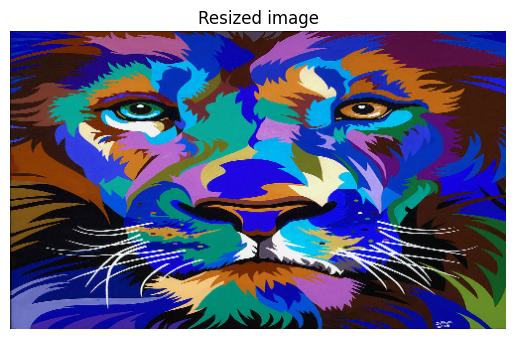

In [43]:
resized_image = cv2.resize(image_opencv, (500, 300))
plt.imshow(resized_image)
plt.title('Resized image')
plt.axis('off')

#### Gray Image

(-0.5, 684.5, 899.5, -0.5)

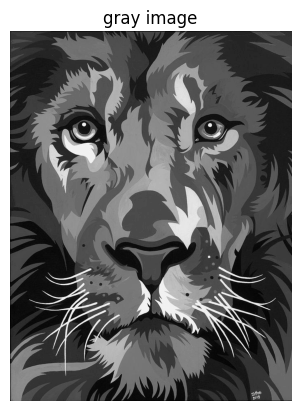

In [44]:
gray_image = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('gray image')
plt.axis('off')

### Colour Identification:

In [45]:
def get_image(image):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def RGB2HEX(color):
    return "#{:02X}{:02X}{:02X}".format(int(color[0]), int(color[1]), int(color[2]))


In [52]:
def get_colors(image, number_of_colors, show_chart):
    warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

    # Convert PIL Image to numpy array
    image_np = np.array(image)
    #debugging
    #print(f"Input image shape before resizing: {image_np.shape}")

    modified_image = cv2.resize(image_np, (600, 400), interpolation=cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0] * modified_image.shape[1], 3)
    clf = KMeans(n_clusters=number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]



    color_names = []
    for hex_color in hex_colors:
        try:
            color_name = webcolors.hex_to_name(hex_color)
        except ValueError:
            color_name = "Unknown"  # Handle cases where no matching color name is found
        color_names.append(color_name)

    if show_chart:
        fig, ax = plt.subplots(figsize=(8, 6))
        wedges, _, autopct_labels = ax.pie(counts.values(), colors=hex_colors, wedgeprops=dict(width=0.4),
                                           autopct='%1.1f%%', pctdistance=0.85)
        ax.set_aspect("equal")  # Ensure equal aspect ratio for a circular shape

        # Move the percentage labels outward and provide a suitable background
        for label in autopct_labels:
            label.set_horizontalalignment('center')
            label.set_verticalalignment('center')
            label.set_bbox(dict(facecolor='white', edgecolor='white', pad=2.0))

        # Create a color legend with formatted labels
        simplified_labels = [f"Color {i+1} ({hex_colors[i]})" for i in range(len(hex_colors))]
        legend = ax.legend(wedges, simplified_labels, title='Colors', loc='center left', bbox_to_anchor=(1, 0.5))
        plt.setp(legend.get_title(), fontsize='large')

    # Return the array of RGB colors
    return np.array(rgb_colors)



[[236.09142347 176.46059162   7.17014096]
 [ 23.29793524  21.6066543   39.69241211]
 [176.66713887  29.82325561  21.16789777]
 [ 43.35270566 124.66380982 194.70778855]
 [185.89987016 107.68979486 156.50111659]
 [126.41857887 145.92894331  10.28625145]
 [ 34.22264489  73.25598568 113.46583874]
 [201.53159883 224.9790486  230.99596428]]


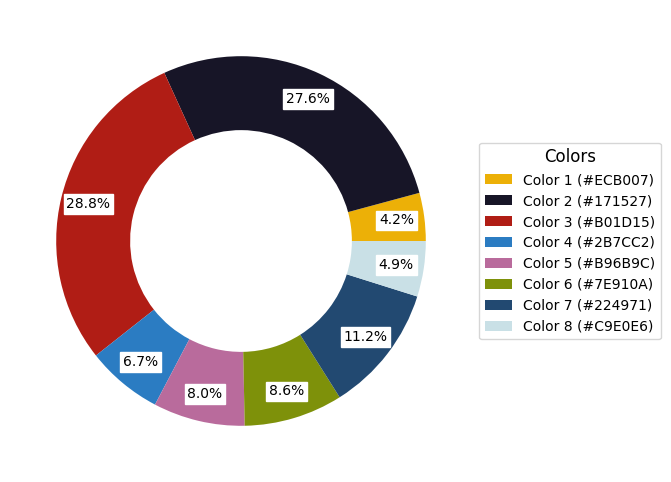

In [53]:
# Image path
image_path = '/content/sample_data/image.jpg'
# Call the function to get colors
rgb_colors= get_colors(get_image(image_path), 8, True)
print(rgb_colors)

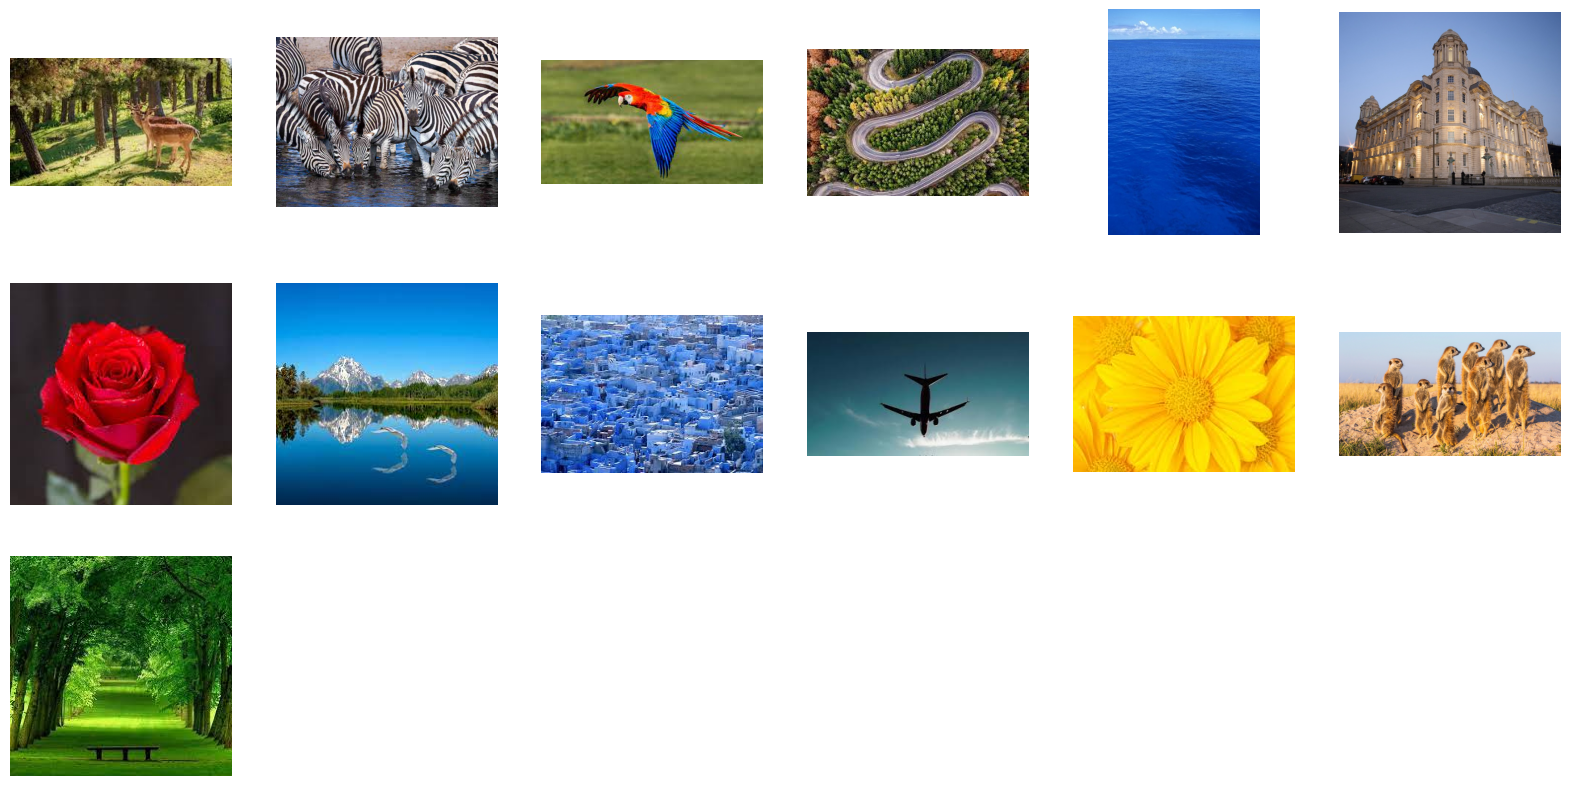

In [96]:
import os
import concurrent.futures
import matplotlib.pyplot as plt
from PIL import Image

IMAGE_DIRECTORY = '/content/sample_data/images_test'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [80, 208, 255],
    'YELLOW': [255, 244, 32],
    'RED': [255, 0, 0]
}
images = []

def load_image(image_path):
    try:
        with Image.open(image_path) as img:
            return img.convert('RGB')
    except Exception as e:
        print(f"Error loading image '{image_path}': {e}")
        return None

def load_images(image_directory):
    image_files = [file for file in os.listdir(image_directory) if not file.startswith('.')]
    image_paths = [os.path.join(image_directory, file) for file in image_files]

    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(load_image, image_paths)

    return [image for image in results if image is not None]

images = load_images(IMAGE_DIRECTORY)

plt.figure(figsize=(20, 10))
num_images = len(images)
num_columns = num_images // 2  # Calculate the number of columns for the subplot
num_rows = (num_images + num_columns - 1) // num_columns  # Calculate the number of rows

for i in range(num_images):
    plt.subplot(num_rows, num_columns, i+1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()


### Search images using colour names

In [97]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    for i, image in enumerate(images):
        selected = match_image_by_color(image, color, threshold, colors_to_match)
        if selected:
            plt.subplot(1, len(images), index)
            plt.imshow(np.array(image))
            plt.axis('off')
            index += 1
            # Remove overlapping axes explicitly
            #plt.gca().remove()
    plt.show()

In [98]:
import numpy as np
from skimage.color import rgb2lab, deltaE_cie76

def match_image_by_color(image, color, threshold=60, number_of_colors=10):
    plt.imshow(image)
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    image_colors_lab = rgb2lab(np.uint8(np.asarray(image_colors)))

    for curr_color in image_colors_lab:
        diff = deltaE_cie76(selected_color, curr_color)
        if diff < threshold:
            return True

    return False


#### Green

<ipython-input-97-228313ee3ccf>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(images), index)


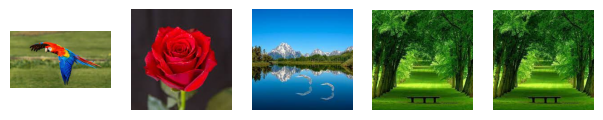

In [99]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 55, 5)

#### Red

<ipython-input-97-228313ee3ccf>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(images), index)


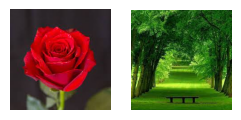

In [100]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 40, 5)

#### Blue

<ipython-input-97-228313ee3ccf>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(images), index)


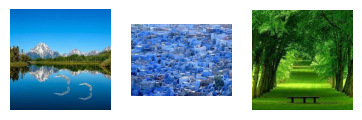

In [101]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 25, 5)

#### Yellow

<ipython-input-97-228313ee3ccf>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(images), index)


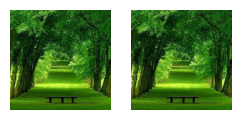

In [102]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 40, 5)

## Conclusion:

1.   Image color detection using K-means clustering is an effective technique for analyzing the predominant colors in images.

2.   K-means clustering helps in identifying a specified number of dominant colors by grouping similar pixels together.

3.   By adjusting the threshold value, the sensitivity of color matching can be controlled to include or exclude similar shades.

4.   The donut chart visualization provides an intuitive representation of color distribution and percentages in the image.

5.   The project successfully identifies and displays images that match the specified color within the given threshold.


  Overall, the color detection project using K-means provides a useful approach to analyze and visualize the dominant colors in images, offering insights into color distribution and facilitating various applications such as image search, color-based image retrieval, and image organization.